In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.57284215289208 -119.10999451493234
-57.024060592002726 -52.95305884456488
-31.842412664806673 29.579148197137187
-35.02431534450594 -164.8035159807199
-5.815609331972183 135.497095063835
59.505791012772306 -139.0298963980839
-36.27355605120278 112.17236811305276
37.94262997828129 45.649322069300126
74.10130088462415 103.09809040638282
-59.81442592168009 -17.59452244270946
7.929522794686889 70.08662392799135
74.52759030474809 171.08685000142538
-42.84899289891306 177.61630899958016
-38.78651391001602 -137.2936268385776
38.03936280145112 -2.976740971517728
-19.118168920515785 -154.8940618946262
81.22892016880579 15.968560922995096
8.928222953607374 -137.50267482035088
-61.1791844112993 53.0618290498912
36.061883212012944 -59.86990577518462
-42.595874131279935 8.097568705255526
-24.980302599077902 116.22670939057764
-39.56816194739254 92.57322763947991
-30.43137331562393 -142.1375671392001
78.48688828841063 -34.28762866763918
-20.29002105200979 174.91624870353297
-68.65075845158078 -10

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [12]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [13]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

600

In [14]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | sorland
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | lokosovo
Processing Record 9 of Set 1 | muyezerskiy
Processing Record 10 of Set 1 | kurilsk
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | nyurba
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping
Processing Record 19 of Set 1 | ylivieska
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | avera
Processing Record 22 of Set 1 | umzimvubu
City not fo

Processing Record 40 of Set 4 | turayf
Processing Record 41 of Set 4 | eyl
Processing Record 42 of Set 4 | anqing
Processing Record 43 of Set 4 | kaura namoda
Processing Record 44 of Set 4 | tasbuget
City not found. Skipping
Processing Record 45 of Set 4 | ardakan
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | maragogi
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | lac du bonnet
Processing Record 50 of Set 4 | payo
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | bur gabo
City not found. Skipping
Processing Record 5 of Set 5 | boulder
Processing Record 6 of Set 5 | tempoal
City not found. Skipping
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 5 | amparafaravola
Processing Record 10 of Set 5 | homer
Processing Record 11 of Set 5 | skalistyy
City not found. Skipping
Processin

Processing Record 29 of Set 8 | hvide sande
Processing Record 30 of Set 8 | buala
Processing Record 31 of Set 8 | wahran
City not found. Skipping
Processing Record 32 of Set 8 | port lincoln
Processing Record 33 of Set 8 | ewo
Processing Record 34 of Set 8 | lakes entrance
Processing Record 35 of Set 8 | san luis
Processing Record 36 of Set 8 | aktau
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | zhaotong
Processing Record 39 of Set 8 | fukue
Processing Record 40 of Set 8 | iacu
Processing Record 41 of Set 8 | skagastrond
City not found. Skipping
Processing Record 42 of Set 8 | rovaniemi
Processing Record 43 of Set 8 | dingle
Processing Record 44 of Set 8 | karaul
City not found. Skipping
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | tsumeb
Processing Record 47 of Set 8 | baoma
Processing Record 48 of Set 8 | kemijarvi
Processing Record 49 of Set 8 | phalombe
Processing Record 50 of Set 8 | ilulissat
Processing Record 1 of Set

Processing Record 17 of Set 12 | ornskoldsvik
Processing Record 18 of Set 12 | hovd
Processing Record 19 of Set 12 | azimur
City not found. Skipping
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | andenes
Processing Record 22 of Set 12 | umea
Processing Record 23 of Set 12 | galveston
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | chichester
Processing Record 26 of Set 12 | kumta
Processing Record 27 of Set 12 | sadovoye
Processing Record 28 of Set 12 | schweinfurt
Processing Record 29 of Set 12 | ossora
Processing Record 30 of Set 12 | hasaki
Processing Record 31 of Set 12 | rio grande
Processing Record 32 of Set 12 | finschhafen
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | lincoln
Processing Record 35 of Set 12 | grand centre
City not found. Skipping
Processing Record 36 of Set 12 | margate
Processing Record 37 of Set 12 | ugoofaaru
Processing Record 38 of Set 12 | west wendover
Processing Record 39 of 

In [15]:
len(city_data)

542

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-05-16 02:18:21,69.4541,-133.0374,39.20,81,75,6.91
1,Albany,US,2022-05-16 02:15:54,42.6001,-73.9662,66.63,94,100,3.36
2,Sorland,NO,2022-05-16 02:19:43,67.6670,12.6934,37.26,67,85,22.70
3,Saint-Philippe,RE,2022-05-16 02:19:43,-21.3585,55.7679,69.39,87,77,11.86
4,Punta Arenas,CL,2022-05-16 02:18:28,-53.1500,-70.9167,41.11,81,0,8.05
5,New Norfolk,AU,2022-05-16 02:19:44,-42.7826,147.0587,53.92,71,44,4.00
6,Lokosovo,RU,2022-05-16 02:19:44,61.1333,74.8167,57.92,60,75,8.19
7,Muyezerskiy,RU,2022-05-16 02:19:45,63.9333,31.6500,40.55,95,100,3.98
8,Kurilsk,RU,2022-05-16 02:19:45,45.2333,147.8833,52.34,52,1,9.48
9,East London,ZA,2022-05-16 02:18:06,-33.0153,27.9116,60.93,83,0,7.20


In [19]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']


In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-05-16 02:18:21,69.4541,-133.0374,39.20,81,75,6.91
1,Albany,US,2022-05-16 02:15:54,42.6001,-73.9662,66.63,94,100,3.36
2,Sorland,NO,2022-05-16 02:19:43,67.6670,12.6934,37.26,67,85,22.70
3,Saint-Philippe,RE,2022-05-16 02:19:43,-21.3585,55.7679,69.39,87,77,11.86
4,Punta Arenas,CL,2022-05-16 02:18:28,-53.1500,-70.9167,41.11,81,0,8.05
...,...,...,...,...,...,...,...,...,...
537,Black Diamond,US,2022-05-16 02:23:18,47.3087,-122.0032,59.59,82,100,1.01
538,Rennes,FR,2022-05-16 02:23:18,48.1667,-1.6667,59.04,88,0,9.22
539,Poum,NC,2022-05-16 02:23:19,-20.2333,164.0167,78.49,72,57,18.52
540,Manoel Urbano,BR,2022-05-16 02:23:19,-8.8389,-69.2597,73.29,99,95,2.44


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

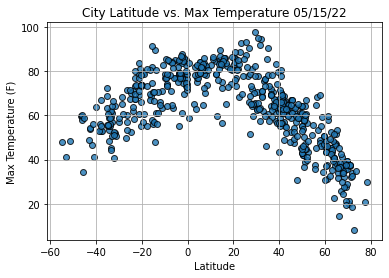

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

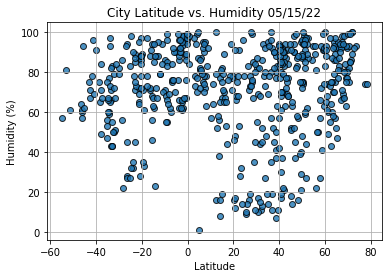

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

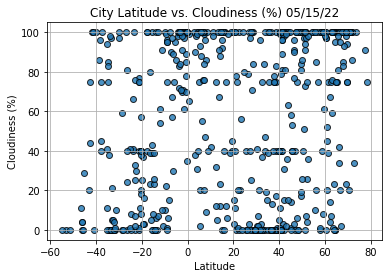

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()